In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

prescott us
barrow us
vaini to
westport nz
dikson ru
rawson ar
mataura pf
albany au
deputatskiy ru
korla cn
vaitupu wf
hilo us
sioux lookout ca
atuona pf
carnarvon au
rikitea pf
ballina ie
hobart au
cabo san lucas mx
carnarvon au
ushuaia ar
atuona pf
amderma ru
auki sb
mataura pf
upernavik gl
vaini to
hasaki jp
cape town za
caravelas br
hobart au
saint george bm
mataura pf
port elizabeth za
tuktoyaktuk ca
nikolskoye ru
ribeira grande pt
santa cecilia br
jacareacanga br
magdagachi ru
chokurdakh ru
ushuaia ar
tuktoyaktuk ca
los llanos de aridane es
rikitea pf
mataura pf
lebanon us
nikolskoye ru
tsihombe mg
piranhas br
hobart au
mataura pf
khatanga ru
hilo us
bereda so
ponta do sol cv
felipe carrillo puerto mx
narsaq gl
jamestown sh
fortuna us
tsihombe mg
busselton au
iqaluit ca
zabol ir
esso ru
inirida co
bredasdorp za
barrow us
bluff nz
yulara au
marsa matruh eg
isa khel pk
severodvinsk ru
alofi nu
ushuaia ar
iberia pe
vaitupu wf
khandyga ru
hermanus za
sentyabrskiy ru
lavrentiya ru
las

jamestown sh
rikitea pf
wajima jp
puerto ayora ec
saint-augustin ca
bintulu my
jamestown sh
new norfolk au
georgetown sh
portland au
ushuaia ar
tasiilaq gl
rockland us
iquique cl
gendringen nl
awjilah ly
nardaran az
tecoanapa mx
hengyang cn
atuona pf
rock sound bs
kashi cn
busselton au
kloulklubed pw
balkanabat tm
nyrob ru
barentsburg sj
gisborne nz
atuona pf
punta arenas cl
severo-kurilsk ru
saldanha za
ardistan ir
abu dhabi ae
misratah ly
akdagmadeni tr
maniwaki ca
hambantota lk
lebu cl
mahebourg mu
vila franca do campo pt
bodden town ky
isangel vu
airai pw
dmitriyevskoye ru
ca mau vn
saint anthony ca
provideniya ru
new norfolk au
buala sb
punta arenas cl
arraial do cabo br
lephepe bw
mount gambier au
atuona pf
skagastrond is
aleksandrov gay ru
albany au
drumheller ca
cape town za
kahului us
taolanaro mg
kanigoro id
amderma ru
severo-kurilsk ru
bambous virieux mu
atuona pf
albany au
ushuaia ar
albany au
arraial do cabo br
new norfolk au
paamiut gl
mataura pf
ijaki ki
georgetown sh
va

stephenville ca
isangel vu
mataura pf
illoqqortoormiut gl
bluff nz
bredasdorp za
dikson ru
albany au
bajina basta rs
saldanha za
mahebourg mu
college us
busselton au
tarko-sale ru
zatoka ua
atuona pf
new norfolk au
ponta do sol cv
bosaso so
albany au
phitsanulok th
busselton au
ribeira grande pt
hermanus za
illoqqortoormiut gl
kruisfontein za
hithadhoo mv
provideniya ru
yellowknife ca
richards bay za
ancud cl
jamestown sh
tubruq ly
sao geraldo do araguaia br
busselton au
oriximina br
mar del plata ar
souillac mu
hermanus za
hamilton bm
ancud cl
bethel us
kapaa us
la romana do
rikitea pf
luangwa zm
bluff nz
kawalu id
pisco pe
mataura pf
mahdasht ir
paradwip in
evensk ru
mar del plata ar
lady frere za
rikitea pf
san patricio mx
leningradskiy ru
vicksburg us
coquimbo cl
dingle ie
san lorenzo de el escorial es
ushuaia ar
chokurdakh ru
bethel us
kritsa gr
queretaro mx
grindavik is
haibowan cn
port alfred za
rikitea pf
kruisfontein za
ushuaia ar
san patricio mx
ushuaia ar
alice springs au
il

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

588

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e7557bb48c087d63050d37b82f17899


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | prescott
Processing Record 2 of Set 1 | barrow
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | westport
Processing Record 5 of Set 1 | dikson
Processing Record 6 of Set 1 | rawson
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | deputatskiy
Processing Record 10 of Set 1 | korla
Processing Record 11 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | sioux lookout
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | carnarvon
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | ballina
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | cabo san lucas
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | amderma
City not found. Skipping...
Processing Record 22 of Set 1 | auki
Processi

Processing Record 36 of Set 4 | cayenne
Processing Record 37 of Set 4 | kaohsiung
Processing Record 38 of Set 4 | petropavlovsk-kamchatskiy
Processing Record 39 of Set 4 | castro
Processing Record 40 of Set 4 | saint-philippe
Processing Record 41 of Set 4 | darhan
Processing Record 42 of Set 4 | tacuarembo
Processing Record 43 of Set 4 | tuatapere
Processing Record 44 of Set 4 | cidreira
Processing Record 45 of Set 4 | xiaolingwei
Processing Record 46 of Set 4 | bafq
Processing Record 47 of Set 4 | siavonga
Processing Record 48 of Set 4 | kampot
Processing Record 49 of Set 4 | cordoba
Processing Record 50 of Set 4 | hinton
Processing Record 1 of Set 5 | saleaula
City not found. Skipping...
Processing Record 2 of Set 5 | popondetta
Processing Record 3 of Set 5 | balakhninskiy
Processing Record 4 of Set 5 | nizhniy lomov
Processing Record 5 of Set 5 | chiredzi
Processing Record 6 of Set 5 | nizwa
Processing Record 7 of Set 5 | mocambique
City not found. Skipping...
Processing Record 8 of

Processing Record 25 of Set 8 | lephepe
City not found. Skipping...
Processing Record 26 of Set 8 | mount gambier
Processing Record 27 of Set 8 | skagastrond
City not found. Skipping...
Processing Record 28 of Set 8 | drumheller
Processing Record 29 of Set 8 | kanigoro
Processing Record 30 of Set 8 | paamiut
Processing Record 31 of Set 8 | ijaki
City not found. Skipping...
Processing Record 32 of Set 8 | van buren
Processing Record 33 of Set 8 | quatre cocos
Processing Record 34 of Set 8 | youghal
Processing Record 35 of Set 8 | taveta
Processing Record 36 of Set 8 | sao gabriel da cachoeira
Processing Record 37 of Set 8 | bakchar
Processing Record 38 of Set 8 | saint-georges
Processing Record 39 of Set 8 | balabac
Processing Record 40 of Set 8 | aykhal
Processing Record 41 of Set 8 | lerwick
Processing Record 42 of Set 8 | teguise
Processing Record 43 of Set 8 | uptar
Processing Record 44 of Set 8 | lamont
Processing Record 45 of Set 8 | mount isa
Processing Record 46 of Set 8 | ewa b

Processing Record 14 of Set 12 | sant julia de loria
Processing Record 15 of Set 12 | jumla
Processing Record 16 of Set 12 | zelenoborskiy
Processing Record 17 of Set 12 | bajina basta
Processing Record 18 of Set 12 | tarko-sale
Processing Record 19 of Set 12 | zatoka
Processing Record 20 of Set 12 | bosaso
Processing Record 21 of Set 12 | phitsanulok
Processing Record 22 of Set 12 | tubruq
City not found. Skipping...
Processing Record 23 of Set 12 | sao geraldo do araguaia
Processing Record 24 of Set 12 | oriximina
Processing Record 25 of Set 12 | la romana
Processing Record 26 of Set 12 | luangwa
Processing Record 27 of Set 12 | kawalu
Processing Record 28 of Set 12 | mahdasht
Processing Record 29 of Set 12 | paradwip
City not found. Skipping...
Processing Record 30 of Set 12 | lady frere
Processing Record 31 of Set 12 | vicksburg
Processing Record 32 of Set 12 | coquimbo
Processing Record 33 of Set 12 | san lorenzo de el escorial
Processing Record 34 of Set 12 | kritsa
Processing Re

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Prescott,34.5400,-112.4685,26.60,63,1,6.91,US,2021-02-07 14:38:41
1,Barrow,71.2906,-156.7887,-18.40,69,75,11.50,US,2021-02-07 14:38:41
2,Vaini,-21.2000,-175.2000,77.00,94,90,10.36,TO,2021-02-07 14:38:41
3,Westport,41.1415,-73.3579,36.00,48,90,9.22,US,2021-02-07 14:38:42
4,Dikson,73.5069,80.5464,-26.86,87,91,10.58,RU,2021-02-07 14:38:42
5,Rawson,-43.3002,-65.1023,60.46,53,31,13.82,AR,2021-02-07 14:35:11
6,Mataura,-46.1927,168.8643,52.79,90,99,1.83,NZ,2021-02-07 14:38:43
7,Albany,42.6001,-73.9662,26.01,73,90,7.34,US,2021-02-07 14:38:43
8,Deputatskiy,69.3000,139.9000,-30.08,86,0,0.81,RU,2021-02-07 14:38:44
9,Korla,41.7597,86.1469,34.34,71,96,9.17,CN,2021-02-07 14:38:44


In [15]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Prescott,US,2021-02-07 14:38:41,34.5400,-112.4685,26.60,63,1,6.91
1,Barrow,US,2021-02-07 14:38:41,71.2906,-156.7887,-18.40,69,75,11.50
2,Vaini,TO,2021-02-07 14:38:41,-21.2000,-175.2000,77.00,94,90,10.36
3,Westport,US,2021-02-07 14:38:42,41.1415,-73.3579,36.00,48,90,9.22
4,Dikson,RU,2021-02-07 14:38:42,73.5069,80.5464,-26.86,87,91,10.58
5,Rawson,AR,2021-02-07 14:35:11,-43.3002,-65.1023,60.46,53,31,13.82
6,Mataura,NZ,2021-02-07 14:38:43,-46.1927,168.8643,52.79,90,99,1.83
7,Albany,US,2021-02-07 14:38:43,42.6001,-73.9662,26.01,73,90,7.34
8,Deputatskiy,RU,2021-02-07 14:38:44,69.3000,139.9000,-30.08,86,0,0.81
9,Korla,CN,2021-02-07 14:38:44,41.7597,86.1469,34.34,71,96,9.17


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1612709007.5182886

In [19]:
time.strftime("%x")

'02/07/21'

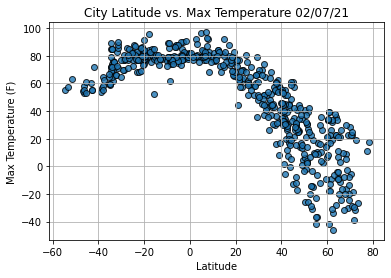

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


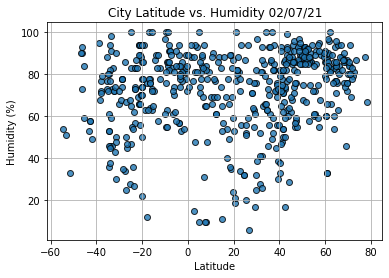

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

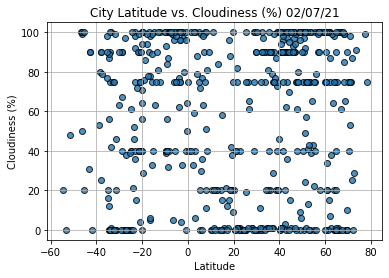

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

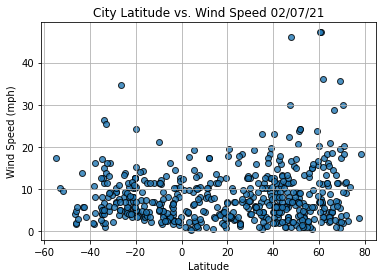

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()